## For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.



In [1]:
# pyplot for plotting
import matplotlib.pyplot as plt
# numpy for vectorized array operations
import numpy as np
# pandas for proper tabular manipulation
import pandas as pd
# scipy stats for our subversions
from scipy import stats
# import scipy.stats

## Q1) A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

    - What is the probability that no cars drive up in the noon hour?

    - What is the probability that 3 or more cars come through the drive through?

    - How likely is it that the drive through gets at least 1 car?

In [2]:
# creating the distribution
λ = 2
cars_dist = stats.poisson(λ)


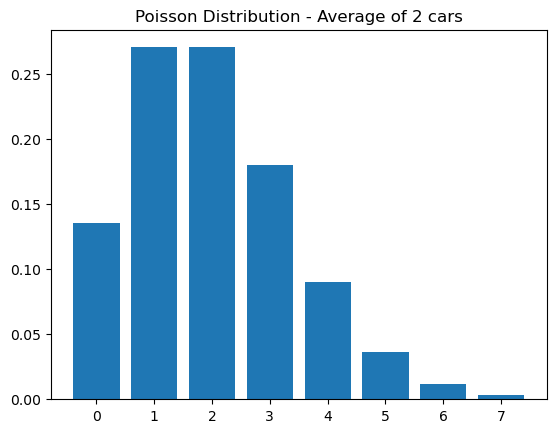

In [3]:
# plotting the data

domain = np.arange(0, 8) # range(8) pick any number
cars_range = [cars_dist.pmf(n) for n in domain]
plt.bar(domain, cars_range)
plt.title('Poisson Distribution - Average of 2 cars')
plt.show()

In [4]:
# Probability that no cars drive up (x=0)
x=0
prob_no_cars = cars_dist.pmf(x)
print(f'probability that no cars drive up:{prob_no_cars:.4f}')

# Probability that 3 or more cars come through (x >= 3)

prob_3_or_more_cars = 1 - cars_dist.cdf(2)
print(f'Probability that 3 or more cars come through:{prob_3_or_more_cars:.4f}')

# Probability that the drive-through gets at least 1 car (x >= 1)
prob_at_least_1_car = 1 - cars_dist.cdf(0)
print(f'Probability that the drive-through gets at least 1 car:{prob_at_least_1_car:.4f}')


probability that no cars drive up:0.1353
Probability that 3 or more cars come through:0.3233
Probability that the drive-through gets at least 1 car:0.8647


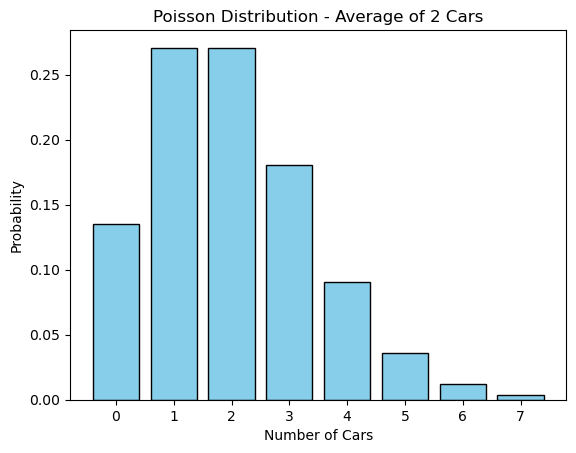

In [7]:
## Another way:- 

# Parameters for the Poisson distribution
average_cars = 2

# Values for the x-axis (number of cars)
x_values = range(0, 8)
cars_dist =stats.poisson(average_cars)

# Calculate Poisson probabilities for each x value
poisson_probs =[cars_dist.pmf(x) for x in x_values]

# Plot the Poisson distribution
plt.bar(x_values, poisson_probs, color='skyblue', edgecolor='black')
plt.title('Poisson Distribution - Average of 2 Cars')
plt.xlabel('Number of Cars')
plt.ylabel('Probability')
plt.show();



In [8]:
#a) What is the probability that no cars drive up in the noon hour?
cars_dist.pmf(0)

0.1353352832366127

In [13]:
#b) What is the probability that 3 or more cars come through the drive through?
cars_dist.sf(x>=3)
 

0.8646647167633873

In [14]:
# c) How likely is it that the drive through gets at least 1 car?
cars_dist.sf(x>0)

0.8646647167633873

## Q2) Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

    - What grade point average is required to be in the top 5% of the graduating class?

    - What GPA constitutes the bottom 15% of the class?

    - An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

    - If I have a GPA of 3.5, what percentile am I in?

In [15]:
μ = 3
σ = 0.3

In [16]:
dist = stats.norm(μ,σ)

In [17]:
dist

### What grade point average is required to be in the top 5% of the graduating class?


In [18]:
dist.isf(0.05).round(2)

3.49

### What GPA constitutes the bottom 15% of the class?

In [19]:
dist.ppf(0.15).round(2)

2.69

### An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class.

### Determine the range of the third decile. 

### Would a student with a 2.8 grade point average qualify for this scholarship?

In [21]:
#1st decile: 0-10 percentile
#2nd decile: 10-20 percentile
#3nd decile: 20-30 percentile

dist.ppf(0.3)

2.842679846187588

In [22]:
dist.ppf(0.2)

2.7475136299281258

In [23]:
lower_gpa,upper_gpa = dist.ppf([0.2,0.3])

In [24]:
lower_gpa,upper_gpa

(2.7475136299281258, 2.842679846187588)

In [25]:
student_gpa=2.8

In [26]:
lower_gpa<student_gpa<upper_gpa

True

from the above result, a student with 2.8 gpa will qualify for this scholarship.

###  If I have a GPA of 3.5, what percentile am I in?

In [27]:
# from the left side
dist.cdf(3.5).round(2)

0.95

In [30]:
# from the right side
dist.sf(3.5).round(2)

0.05

95th percentile

## Q3) A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [32]:
# Given values
num_trials = 4326
click_through_rate = 0.02
num_click_throughs_observed = 97

# Calculate the probability of getting 97 click-throughs or more
# prob_at_least_97 = 1 - stats.binom.cdf(num_click_throughs_observed, num_trials, click_through_rate)

prob_at_least_97=stats.binom.sf(96, num_trials, click_through_rate).round(2) #sf is exclusive function


# Print result
print(f"Probability of getting 97 click-throughs or more: {prob_at_least_97:.4f}")


Probability of getting 97 click-throughs or more: 0.1400


In [33]:
# 2nd way
n=4326
click_through=0.02
x=97
dist_click=stats.binom(n,click_through)

In [34]:
# Calculate the probability of getting 97 click-throughs or more
dist_click.sf(96).round(2)

0.14

## Q4) You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

### What is the probability that at least one of your first 60 answers is correct?

Theoretically,

If you randomly guess the answer to each question, and each answer is a probability rounded to the hundredths place, then the probability of getting any single question correct is 
1/100 because there are 100 possible answers.

The probability of getting at least one of the first 60 answers correct is equal to 1 minus the probability of getting all of them wrong. 

The probability of getting a single question wrong is 99/100, so the probability of getting all 60 questions wrong is 
(99/100)^60.

Therefore, the probability of getting at least one question correct in the first 60 is:

P(at least one correct in the first 60) = 1 − (99/100)^60


In [35]:


# Number of questions
num_questions = 60

# Probability of getting a single question correct
prob_correct_single_question = 1 / 100

# Probability of getting at least one question correct in the first 60 attempts
prob_at_least_one_correct = 1 - stats.binom.cdf(0, num_questions, prob_correct_single_question)

print(f"Probability of getting at least one correct in the first 60: {prob_at_least_one_correct:.4f}")


Probability of getting at least one correct in the first 60: 0.4528


In [37]:
# another way using sf(survival function)

prob_at_least_one_correct =stats.binom.sf(0, num_questions, prob_correct_single_question)
prob_at_least_one_correct.round(2)
                               

0.45

## Q5) The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area.

Q5-a) How likely is it that the break area gets cleaned up each day? 

Q5-b) How likely is it that it goes two days without getting cleaned up? All week?

In [38]:
n_trials=int(0.9*3*22) # no partial people allowed at codeup

In [39]:
n_trials

59

In [40]:
prob_outcome_cleanup=0.03
prob_outcome_cleanup

0.03

In [41]:
# the probability of zero cleaned up out of n_trials in each day is given by
# binomial distribution

stats.binom.pmf(0,n_trials,prob_outcome_cleanup)

0.16578007115626478

### Q5-a) How likely is it that the break area gets cleaned up each day? 

In [42]:
prob_cleanedup=1-stats.binom.pmf(0,n_trials,prob_outcome_cleanup)
prob_cleanedup


0.8342199288437352

In [45]:
# another way by using sf:
stats.binom(n_trials,prob_outcome_cleanup).sf(0).round(2)

0.83

### Q5-b) How likely is it that it goes two days without getting cleaned up? All week?

In [47]:
# for two days without getting cleaned up
# since each day is independent



prob_two_days_not_cleanedup =stats.binom.pmf(0,2*n_trials,prob_outcome_cleanup) 
prob_two_days_not_cleanedup.round(2)                             

0.03

In [51]:
# for a week without getting cleaned up


prob_week_not_cleanedup = stats.binom.pmf(0,5*n_trials,prob_outcome_cleanup) 
prob_week_not_cleanedup.round(6)

0.000125

### Q6) You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 

### If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.



In [55]:
# Given parameters
mean_X = 15
std_dev_X = 3
time_to_eat = 15  # minutes

# Calculate the mean and standard deviation of Y
mean_Y = 2 * mean_X 
std_dev_Y = 2 * std_dev_X

In [56]:
line_time=60-(15+10+2)
line_time

33

In [57]:
# the prob of the line taking 33 mins or less
prob_ofthe_line=stats.norm(mean_Y,std_dev_Y).cdf(line_time).round(2)
prob_ofthe_line


0.69

## Q7) Connect to the employees database and find the average salary of current employees, along with the standard deviation. 

## For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.


#### a. What percent of employees earn less than 60,000?

#### b. What percent of employees earn more than 95,000?

#### c. What percent of employees earn between 65,000 and 80,000?

#### d. What do the top 5% of employees make?

In [70]:
import env

In [71]:
def get_db_url(hostname, username, password,database):
        return f"mysql+pymysql://{username}:{password}@{hostname}/{database}"

    

In [72]:
url=get_db_url(env.hostname,env.username,env.password,'employees')

# url not leaving it printed out

In [73]:
query1="select * from salaries where to_date>now() limit 5"

In [74]:
df=pd.read_sql(query1,url)

In [75]:
df.head()

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01


In [76]:
# lets rip out the std and mean from the salaries here:
sal_stats = df.salary.agg(['mean', 'std'])

In [77]:
sal_stats

mean    74709.000000
std     19958.550311
Name: salary, dtype: float64

In [78]:
sal_stats.values

array([74709.        , 19958.55031058])

In [83]:
dist = stats.norm(*sal_stats.values)

In [84]:
# a. What percent of employees earn less than 60,000?

percent_below_60000 = dist.cdf(60000) *100
percent_below_60000


23.0568054401618

In [85]:
# b. What percent of employees earn more than 95,000?
percent_above_95000 = (1 - dist.cdf(95000)) * 100
percent_above_95000

15.465831270468854

In [86]:
# c. What percent of employees earn between 65,000 and 80,000?
percent_between_65000_80000 = (dist.cdf(80000) - dist.cdf(65000)) * 100
percent_between_65000_80000


29.121238516762034

In [89]:
# another way
higher,lower = dist.cdf([80000,56000])
higher-lower


0.4302552716830573

In [87]:
# d. What do the top 5% of employees make?
top_5_percent_salary = dist.ppf(0.95)
top_5_percent_salary

107537.89386705289